In [2]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt 
import ESN
import util


In [33]:
dim=[[1]]*3
print(dim)
lsdim=[[1],[1],[2],[1,2],[1,2]]
lsdim[:3]=dim
lsdim+=dim

print(lsdim)


[[1], [1], [1]]
[[1], [1], [1], [1, 2], [1, 2], [1], [1], [1]]


In [14]:
T = 100000
eta = torch.normal(0,1,(T,))
ys=torch.zeros(T)
ys = torch.tensor([ys[i-1]+eta[i-1] for i in range(1, T)])


print(eta)
print(ys)

tensor([-0.9522, -0.2854,  0.2484,  ...,  0.3205, -1.8888, -1.0244])
tensor([-0.9522, -0.2854,  0.2484,  ...,  0.4466,  0.3205, -1.8888])


In [2]:
n = torch.normal(0,1,(100000,))
t,y,delta_y=util.Ornstein_Uhlenbeck(n,3,0,3)

plt.figure(figsize=(12,8))
plt.plot(t,y)
plt.xlabel("time")
plt.ylabel("y")
plt.show()

IndexError: index 100000 is out of bounds for dimension 0 with size 100000

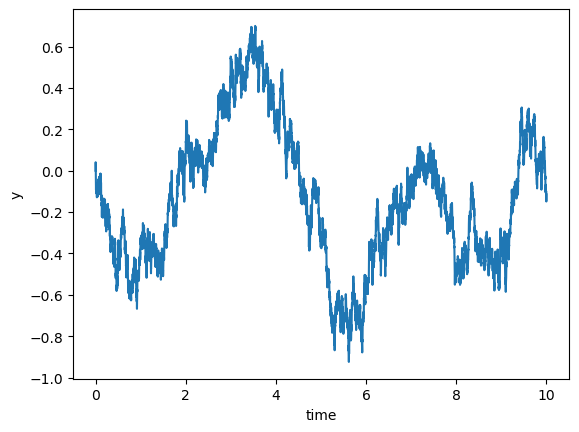

In [5]:
""" from wiki: euler-maruyama method  """

# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt


class Model:
    """Stochastic model constants."""
    THETA = 1
    MU = 0
    SIGMA = 0.5


def mu(y: float, _t: float) -> float:
    """Implement the Ornstein–Uhlenbeck mu."""
    return Model.THETA * (Model.MU - y)


def sigma(_y: float, _t: float) -> float:
    """Implement the Ornstein–Uhlenbeck sigma."""
    return Model.SIGMA


def dW(delta_t: float) -> float:
    """Sample a random number at each call."""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))


def run_simulation():
    """ Return the result of one full simulation."""
    T_INIT = 0
    T_END = 10
    N = 10000  # Compute at 1000 grid points
    DT = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)
    assert TS.size == N + 1

    Y_INIT = 0

    ys = np.zeros(TS.size)
    ys[0] = Y_INIT
    for i in range(1, TS.size):
        t = T_INIT + (i - 1) * DT
        y = ys[i - 1]
        ys[i] = y + mu(y, t) * DT + sigma(y, t) * dW(DT)

    return TS, ys


def plot_simulations(num_sims: int):
    """ Plot several simulations in one image."""
    for _ in range(num_sims):
        plt.plot(*run_simulation())

    plt.xlabel("time")
    plt.ylabel("y")
    plt.show()


if __name__ == "__main__":
    NUM_SIMS = 1
    plot_simulations(NUM_SIMS)

In [2]:
import torch

tensor = torch.randn(100, 100)  # Example tensor
memory_in_bytes = tensor.numel() * tensor.element_size()
memory_in_mb = memory_in_bytes / (1024 ** 2)

print(f"Memory usage: {memory_in_mb:.2f} MB")

Memory usage: 0.04 MB


In [8]:
import Dynamics_Res
import torch

u = torch.rand(1, 400)*2-1
#u = torch.zeros(2,1000)
logi = Dynamics_Res.Logistic(sigma=0.01,rho=2.5)

Xwo = logi.run_washout(u,Two=100)




y=Xwo[:,0]
x=np.arange(y.shape[0])

plt.figure(figsize=(12,8))
plt.plot(x,y,"o-",alpha=0.3)




TypeError: vstack() got an unexpected keyword argument 'dim'

In [38]:
import Dynamics_Res
import torch

x=torch.tensor([ 1.3990,  1.3661, -0.6685,  0.7196,  0.4342])
a_0 = (x>0)*x
a_1 = a_0>1
a_0 - a_0*a_1 + a_1*1


tensor([ 1.3990,  1.3661, -0.6685,  0.7196,  0.4342])
tensor([1, 1, 0, 0, 0])
tensor([1.3990, 1.3661, -0.0000, 0.7196, 0.4342])
tensor([0.0000, 0.0000, 0.0000, 0.7196, 0.4342])
tensor([1.0000, 1.0000, 0.0000, 0.7196, 0.4342])


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

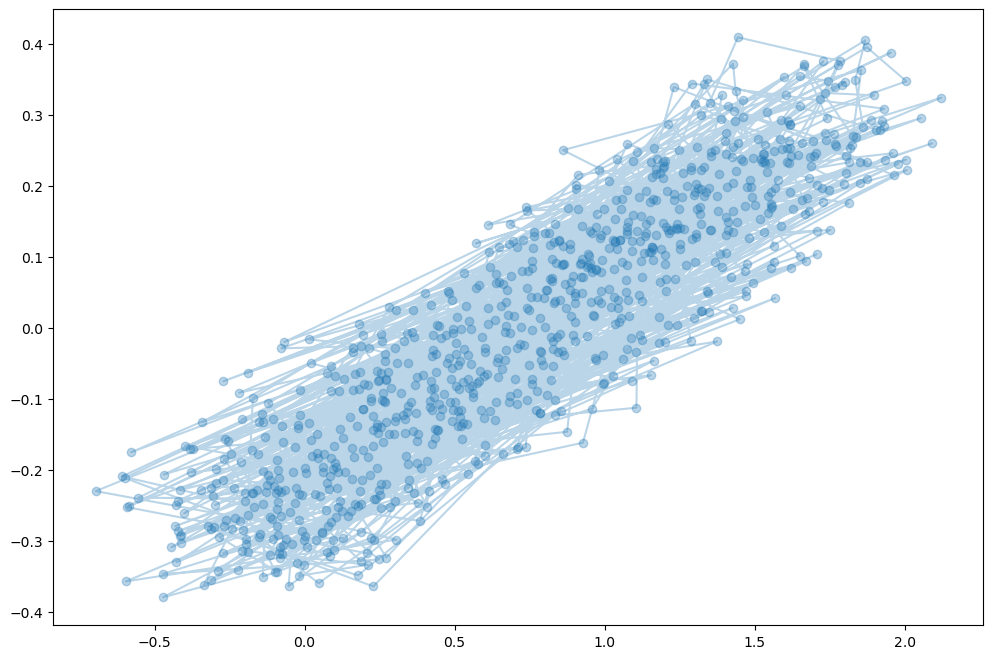

In [3]:
import Dynamics_Res
import torch

u = torch.rand(2, 1000)*2-1
#u = torch.zeros(2,1000)

#u=torch.zeros(2,10000)

henon = Dynamics_Res.Henon(sigma=1)
Xwo = henon.run_washout(u,Two=100)



x=Xwo[:,0]
y=Xwo[:,1]
plt.figure(figsize=(12,8))
plt.plot(x,y,"o-",alpha=0.3)




In [27]:
mfs = ESN.MC_cSVD_asym(u,Xwo,2).cpu().numpy()
mc=np.sum(mfs)
print(mc)

0.541673


In [5]:
sigmas = torch.linspace(0.1,2.0,39)
for sigma in sigmas:
    fn = r"10N_2din_%.2f_s"%(sigma)
    #print(fn)

In [40]:
a = [0]*5
print(a)
a[0]=a[0]+torch.rand((2,3))+torch.rand((2,3))
print(a)

[0, 0, 0, 0, 0]
[tensor([[1.1137, 0.2411, 0.9299],
        [1.1393, 1.4397, 1.5366]]), 0, 0, 0, 0]


In [25]:

setdegrees=np.array([1,2,4,5])
dgr=1
np.where(setdegrees>=3)[0][0]
a=np.array([1,2])
print(a[0:])

[1 2]


In [40]:
a=[]
a+= ([[1]]*5)
print(a)

[[1], [1], [1], [1], [1]]


In [26]:
#import torch._C._special.special_legendre_polynomial_p as legendre

legendre = torch._C._special.special_legendre_polynomial_p
a=torch.tensor(0.3)
b=torch.tensor([0.3,0.5])
d=torch.tensor(1)

print(legendre(a,d*2))
esnlg = ESN.polynomials("legendre")

print(legendre(b,4))
print(esnlg(b,4))


tensor(-0.3650)
tensor([ 0.0729, -0.2891])
tensor([ 0.0729, -0.2891])


In [25]:
a=torch.zeros((1,5))
b=torch.rand((2,5))
c=torch.rand((5))
x=torch.cat((a,b),0)
x=torch.cat((x,c.unsqueeze(0)))
print(x)
print(x[1:])

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3877, 0.3618, 0.4848, 0.4423, 0.3158],
        [0.0817, 0.9376, 0.5886, 0.1609, 0.2759],
        [0.9051, 0.0576, 0.3894, 0.7711, 0.7100]])
tensor([[0.3877, 0.3618, 0.4848, 0.4423, 0.3158],
        [0.0817, 0.9376, 0.5886, 0.1609, 0.2759],
        [0.9051, 0.0576, 0.3894, 0.7711, 0.7100]])


In [3]:
x = torch.tensor(())

for i in range(4):
    a = torch.rand(3)
#    x = torch.hstack((x,a.view(a.shape[0], 1)))
    x = torch.cat((x,a.unsqueeze(0)),0)

#    x = torch.vstack((x,a.unsqueeze(0)))
#print(torch.sum(x,dim = 0))
print(x)
print(torch.linalg.norm(x,dim=1))
print(x**2)
x = x / torch.linalg.norm(x,dim=1).unsqueeze(0).T
print(torch.sum(x**2,dim = 1))


tensor([[0.3176, 0.1808, 0.4600],
        [0.0251, 0.6024, 0.6012],
        [0.7161, 0.5240, 0.5647],
        [0.0151, 0.7281, 0.3983]])
(tensor([1, 1, 2, 2, 2, 3]), tensor([1, 2, 0, 1, 2, 1]))
tensor([0.5875, 0.8514, 1.0518, 0.8301])
tensor([[1.0086e-01, 3.2671e-02, 2.1164e-01],
        [6.3183e-04, 3.6284e-01, 3.6145e-01],
        [5.1286e-01, 2.7461e-01, 3.1885e-01],
        [2.2844e-04, 5.3018e-01, 1.5866e-01]])
tensor([1.0000, 1.0000, 1.0000, 1.0000])


In [8]:
a = torch.normal(0,1,(3,6))
srtd = torch.sort(a,dim=0)[0]
print(a)
print(srtd)
vars = torch.var(a,dim=1)
print(vars)

tensor([[-0.7069, -0.0934, -0.1258,  0.9731, -0.5502, -0.0475],
        [-0.3138,  1.1785,  1.2053,  0.5314,  1.1367, -0.2420],
        [ 0.1601, -0.2814,  0.6978,  0.0728, -0.4957,  0.8686]])
tensor([[-0.7069, -0.2814, -0.1258,  0.0728, -0.5502, -0.2420],
        [-0.3138, -0.0934,  0.6978,  0.5314, -0.4957, -0.0475],
        [ 0.1601,  1.1785,  1.2053,  0.9731,  1.1367,  0.8686]])
tensor([0.3451, 0.5072, 0.2846])


In [7]:
import time
pro_size = 10
for i in range(1, pro_size + 1):
    pro_bar = ('=' * i) + (' ' * (pro_size - i))
    print('\r[{0}] {1}/{2}'.format(pro_bar, i, pro_size), end='')
    time.sleep(0.5)


[==========] 10/10

46


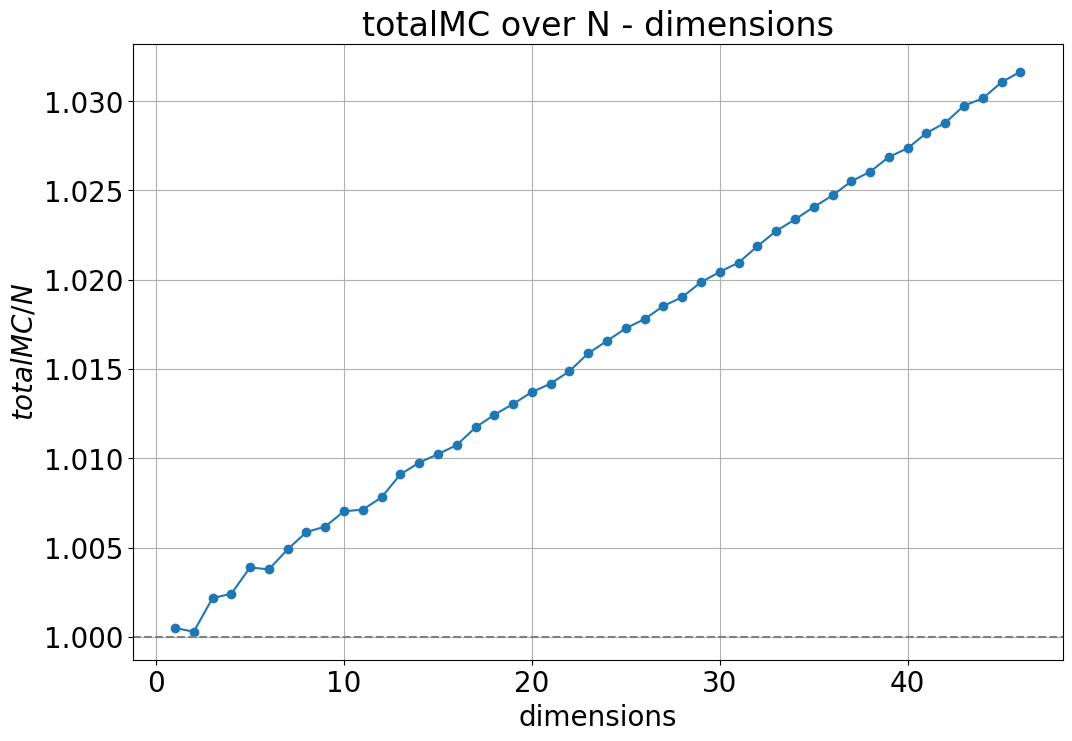

In [5]:
totMCs = np.loadtxt("mcs_res.txt")
#totMCs = np.loadtxt("mcs_res_newsur.txt")
print(len(totMCs))
dims = np.arange(1,len(totMCs)+1)
res = (totMCs/dims)/100
plt.rcParams.update({'font.size': 20})
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(dims,res, marker = "o")
#plt.ylim(0,1.1)
plt.axhline(y=1, color='grey', linestyle='--')
#plt.xticks(dims)
plt.xlabel("dimensions")
plt.ylabel(r'$totalMC/N$')
plt.title('totalMC over N - dimensions')
plt.grid(True)

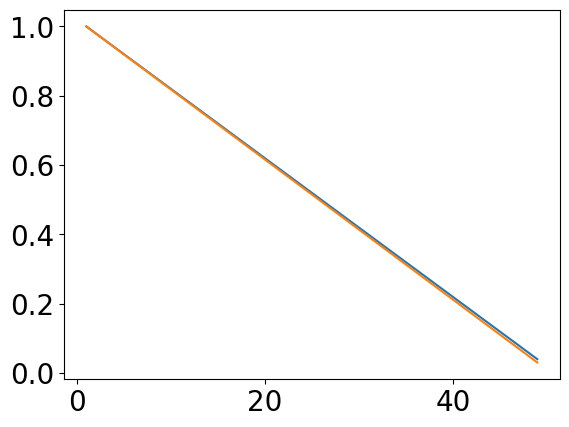

In [172]:
sur = 0.01
x = torch.arange(1,50)
a = torch.arange(50,1,-1)/50
b = a - (1-a)*sur
fix,ax = plt.subplots()
plt.plot(x.cpu().numpy(),a.cpu().numpy())
plt.plot(x.cpu().numpy(),b.cpu().numpy())
plt.show()

In [161]:
a = torch.arange(1,100)
print(a.shape[0])
print(a[50:99])
print(a[50:99].shape[0])

99
tensor([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
        87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], device='cuda:0')
49


In [178]:
a = torch.ones(5)
A = torch.diag(torch.cat((a,torch.zeros(2))))
u,sig,vh = torch.linalg.svd(A,full_matrices = False)


torch.return_types.linalg_svd(
U=tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]], device='cuda:0'),
S=tensor([1., 1., 1., 1., 1., 0., 0.], device='cuda:0'),
Vh=tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]], device='cuda:0'))

In [21]:
x = torch.cat((torch.ones(4),torch.zeros(3)))
x = torch.ones(8)
print(x)
print(torch.where(x==0)[0].shape[0]==0)

tensor([1., 1., 1., 1., 1., 1., 1., 1.])


AttributeError: 'tuple' object has no attribute 'shape'

In [66]:
dim,tau,T = 2, 5,10
r = 3
torch.manual_seed(0)
taus = torch.arange(tau)
u = torch.rand((dim,T+tau))
y_matrix = torch.tensor(())    
for d in range(dim):
    y_matrix = torch.cat((y_matrix,torch.stack([u[d][tau:T+tau] for tau in taus]).unsqueeze(0)),0)
#print(y_matrix)
print(y_matrix.shape)
norms = torch.norm(y_matrix, dim=2).unsqueeze(2)
print(norms.shape)
ytilde = y_matrix / norms 
torch.norm(ytilde,dim=2)
print(ytilde.shape)
x = torch.rand(T,r)
print((ytilde @ x).shape)
mfs = torch.sum((ytilde @ x)**2 , dim=2)
print(mfs)
mfs.shape

torch.Size([2, 5, 10])
torch.Size([2, 5, 1])
torch.Size([2, 5, 10])
torch.Size([2, 5, 3])
tensor([[4.9638, 5.4733, 6.0397, 5.2750, 5.0801],
        [5.8528, 5.2509, 4.7865, 6.3472, 5.2300]])


torch.Size([2, 5])

In [33]:

alphas = torch.tensor([1/2,1,1,1,2,2])
betas = torch.tensor([1/2,1,2,5,2,5])
m = torch.distributions.Beta(alphas,betas)
print(m.rsample((10,)).T)
d = m.rsample((100000,)).T

tensor([[0.5603, 0.9983, 0.0360, 0.7768, 0.7179, 0.3068, 0.8574, 0.4175, 0.4942,
         0.9837],
        [0.4905, 0.0979, 0.2881, 0.1691, 0.1102, 0.4619, 0.6157, 0.9817, 0.4528,
         0.0858],
        [0.3358, 0.7543, 0.2279, 0.0373, 0.0305, 0.2822, 0.4529, 0.0333, 0.0900,
         0.0608],
        [0.2589, 0.2019, 0.3262, 0.2163, 0.1017, 0.2104, 0.0185, 0.3538, 0.3728,
         0.2602],
        [0.2270, 0.7667, 0.2668, 0.5714, 0.8701, 0.5608, 0.2786, 0.6916, 0.5071,
         0.2521],
        [0.3472, 0.1595, 0.2842, 0.1310, 0.2570, 0.2377, 0.5796, 0.1512, 0.2311,
         0.1057]])


In [32]:
print(m.mean.unsqueeze(1))
torch.mean(d,dim=1)

tensor([[0.5000],
        [0.5000],
        [0.3333],
        [0.1667],
        [0.5000],
        [0.2857]])


tensor([0.5003, 0.5000, 0.3338, 0.1664, 0.5005, 0.2856])

In [11]:
import torch

T=100
N=10
n=3

Xwo = torch.rand((T,N))
targets = torch.rand((n,T))

if Xwo.shape[0] == target.shape[0]:
    T = Xwo.shape[0]
N = Xwo.shape[1]


U,sigma,_ = torch.linalg.svd(Xwo,full_matrices=False)
if sigma[N-1] != 0: rank = N
else : rank = torch.where(sigma==0)[0][0]
P = U[:,:rank]
# P: T * rank
# target : Ttrain * (target units)
norms = torch.norm(targets, dim=1).unsqueeze(1)
# capacities : target units
capacities = torch.sum(((targets / norms) @ P)**2,dim=1) 
print(capacities)

tensor([0.7527, 0.7749, 0.7133], device='cuda:0')


In [14]:
dgr = 5
subsets = [[dgr-i,i] for i in range(int(dgr/2)+1)]
print(subsets)

[[5, 0], [4, 1], [3, 2]]


In [10]:
from itertools import combinations_with_replacement as C_rep
import time
dgr=7
maxdly=15
dims=1
st = time.time()
comb = list(C_rep(range(int(dims*maxdly)),dgr))
print(time.time()-st)
print(len(comb))
print(comb[-1])

0.008725881576538086
116280
(14, 14, 14, 14, 14, 14, 14)


In [6]:
from itertools import combinations_with_replacement as C_rep
dgr=3
maxdly=50
dims=1
comb = list(C_rep(range(int(dims*maxdly)),dgr))
print(comb[1250:1276])

[(0, 43, 46), (0, 43, 47), (0, 43, 48), (0, 43, 49), (0, 44, 44), (0, 44, 45), (0, 44, 46), (0, 44, 47), (0, 44, 48), (0, 44, 49), (0, 45, 45), (0, 45, 46), (0, 45, 47), (0, 45, 48), (0, 45, 49), (0, 46, 46), (0, 46, 47), (0, 46, 48), (0, 46, 49), (0, 47, 47), (0, 47, 48), (0, 47, 49), (0, 48, 48), (0, 48, 49), (0, 49, 49), (1, 1, 1)]


In [38]:
from itertools import combinations_with_replacement as C_rep

dgr=7
maxdly=15
dims=1
st = time.time()
C_rep(range(int(dims*maxdly)),dgr)
print(time.time()-st)


dd_inds = torch.tensor(list(C_rep(range(int(dims*maxdly)),dgr)))
#print(dd_inds)

units = dd_inds.shape[0]
#torch.reshape(dd,(units,dims,dly))
ddsets = []
for ind in dd_inds:
    dd = torch.zeros(dims*maxdly)  
    for i in range(dgr):
        dd[ind[i]]+=1
    ddsets.append(dd)
print(units) 
print(ddsets[:10])
print(torch.reshape(ddsets[9],(dims,maxdly)))

220
[tensor([3., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), tensor([2., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), tensor([2., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), tensor([2., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), tensor([2., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), tensor([2., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), tensor([2., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), tensor([2., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), tensor([2., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), tensor([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.])]
tensor([[2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.]])


In [1]:
import ESN
import torch
d = 2
Tall = 300
Two = 100

u = torch.rand((d,Tall))
f = ESN.polynomials("legendre")



targets,dgrs = ESN.make_targets(u,[[2,4],[3,3]],Two=Two)
print(targets.shape)
print(dgrs.shape)
print(dgrs)



torch.Size([92, 200])
torch.Size([92])
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.])


In [ ]:

u = torch.rand((10,2,4))
for i,dd in enumerate(ddsets):
    print(i)
    print(torch.reshape(dd,(2,5)))
    print(dd)